In [1]:
import wandb
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import wandb
import pandas as pd
import matplotlib.pyplot as plt

In [8]:

# Initialize wandb API
api = wandb.Api()

# Replace 'your_sweep_id' with your actual sweep ID
sweep_id = 'maximes_other_crew/SeqBench_GSC/dhhu42ey'

# Fetch the sweep object
sweep = api.sweep(sweep_id)

# Fetch all runs in the sweep
runs = sweep.runs

sweep_params = ['feat_size', 'model', 'test_dur']#'seed', 

In [9]:
runs

<Runs maximes_other_crew/SeqBench_GSC>

In [10]:
# Initialize an empty DataFrame to hold the relevant data
data = []

# Extract the necessary data from each run
for run in runs:
    config = run.config
    summary = run.summary
    feat_size = config.get('feat_size')
    model = config.get('model')
    # seed = config.get('seed')
    test_dur = config.get('test_dur')
    sched_factor = config.get('scheduler_factor')
    test_acc = summary.get('test_acc')

    if test_acc is not None:
        data.append({
            'feat_size': feat_size,
            'model': model,
            # 'seed': seed,
            'test_dur': test_dur,
            'test_acc': test_acc
        })



In [11]:
data

[{'feat_size': 512,
  'model': 's4',
  'test_dur': 1000,
  'test_acc': 0.22747664153575897},
 {'feat_size': 512,
  'model': 's4',
  'test_dur': 700,
  'test_acc': 0.4022667407989502},
 {'feat_size': 512,
  'model': 's4',
  'test_dur': 300,
  'test_acc': 0.8533568382263184},
 {'feat_size': 512,
  'model': 's4',
  'test_dur': 1000,
  'test_acc': 0.25563329458236694},
 {'feat_size': 512,
  'model': 's4',
  'test_dur': 700,
  'test_acc': 0.45647993683815},
 {'feat_size': 512,
  'model': 's4',
  'test_dur': 300,
  'test_acc': 0.8624899983406067},
 {'feat_size': 512,
  'model': 's4',
  'test_dur': 700,
  'test_acc': 0.3810066878795624},
 {'feat_size': 512,
  'model': 's4',
  'test_dur': 1000,
  'test_acc': 0.20832659304142},
 {'feat_size': 512,
  'model': 's4',
  'test_dur': 300,
  'test_acc': 0.7995230555534363},
 {'feat_size': 384,
  'model': 'gru',
  'test_dur': 3000,
  'test_acc': 0.9578630924224854},
 {'feat_size': 384,
  'model': 'gru',
  'test_dur': 2000,
  'test_acc': 0.9749166965484

In [12]:
# Convert the data to a DataFrame for easier manipulation
df = pd.DataFrame(data)

# Calculate the number of runs for each line configuration
df['run_count'] = df.groupby(sweep_params).transform('size')

# Group by n_layers and lr, then compute the mean of best_valid_acc for each group
df_grouped = df.groupby(sweep_params+ ['run_count']).agg({'test_acc':['mean', 'std']}).reset_index()


df_grouped_sorted = df_grouped.sort_values(by=('test_acc','mean'), ascending=False).reset_index(drop=True)

In [13]:
df_grouped_sorted[0:30]

feat_size  model test_dur run_count  test_acc          
                                            mean       std
0        384    gru      300         3  0.971758  0.027678
1        384    gru      700         3  0.970237  0.027454
2        384    gru     1000         3  0.968492  0.026946
3        384    gru     2000         3  0.957706  0.024954
4        384    gru     3000         3  0.939718  0.021922
5        215    gru      300         3  0.939666  0.029348
6        215    gru      700         3  0.933316  0.029475
7        215    gru     1000         3  0.925224  0.029382
8        256  mamba      300         3  0.893437  0.031003
9        215    gru     2000         3  0.884799  0.029576
10       256  mamba      700         3  0.862249  0.034057
11       512     s4      300         3  0.838457  0.034025
12       215    gru     3000         3  0.830048  0.027145
13       128  mamba      300         3  0.827441  0.041185
14       256  mamba     1000         3  0.795629  0.037012
15       128  mamba      700         3  0.782971  0.048078
16       256     s4      300         3  0.745110  0.032192
17       128  mamba     1000         3  0.687742  0.072632
18       512     s4      700         3  0.413251  0.038917
19       256  mamba     2000         3  0.380432  0.007184
20       256     s4      700         3  0.359652  0.027232
21       128  mamba     2000         3  0.300336  0.134595
22       512     s4     1000         3  0.230479  0.023796
23       256     s4     1000         3  0.213504  0.013494
24       256  mamba     3000         3  0.186644  0.007996
25       256     s4     2000         3  0.168513  0.016232
26       128  mamba     3000         3  0.167280  0.051998
27       256     s4     3000         3  0.163769  0.017875

In [18]:
len(data)

252

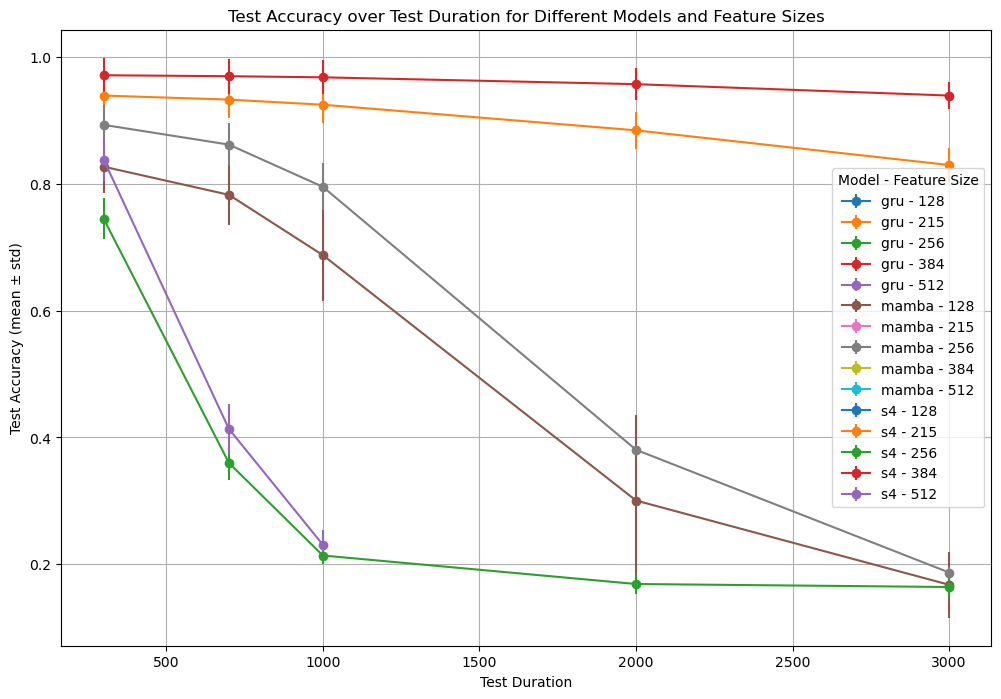

In [17]:
df = df_grouped

df['model'] = df['model'].astype('category')
df['feat_size'] = df['feat_size'].astype('category')

# Plotting
plt.figure(figsize=(12, 8))

for model in df['model'].cat.categories:
    model_data = df[df['model'] == model]
    for size in model_data['feat_size'].cat.categories:
        size_data = model_data[model_data['feat_size'] == size]
        plt.errorbar(
            size_data['test_dur'],
            size_data['test_acc']['mean'],
            yerr=size_data['test_acc']['std'],
            label=f"{model} - {size}",
            fmt='-o'
        )

plt.xlabel('Test Duration')
plt.ylabel('Test Accuracy (mean ± std)')
plt.title('Test Accuracy over Test Duration for Different Models and Feature Sizes')
plt.legend(title='Model - Feature Size')
plt.grid(True)
plt.show()

(array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 [Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6, '0.6'),
  Text(0, 0.7000000000000001, '0.7'),
  Text(0, 0.8, '0.8'),
  Text(0, 0.9, '0.9'),
  Text(0, 1.0, '1.0')])

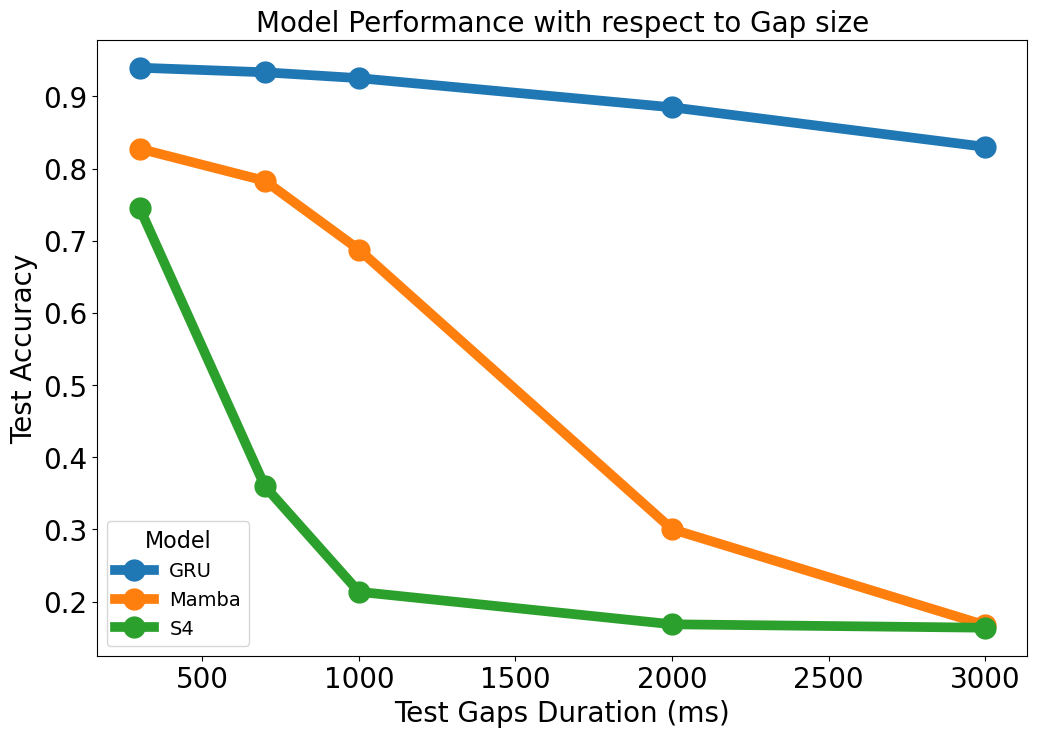

In [33]:
df = df_grouped

df['model'] = df['model'].astype('category')
df['feat_size'] = df['feat_size'].astype('category')

# Plotting
plt.figure(figsize=(12, 8))

selected_pairs = [('gru', 215, 'GRU'), ('mamba', 128, 'Mamba'), ('s4', 256, 'S4')]


for model, size, label in selected_pairs:
    filtered_data = df[(df['model'] == model) & (df['feat_size'] == size)]
    
    
    plt.plot(
        filtered_data['test_dur'],
        filtered_data['test_acc']['mean'],
        label=label,
        marker='o',
        linewidth=7,
        markersize=15
    )

fontsize = 20
# Increase font sizes
plt.xlabel('Test Gaps Duration (ms)', fontsize=fontsize)
plt.ylabel('Test Accuracy', fontsize=fontsize)
plt.title('Model Performance with respect to Gap size', fontsize=20)

# Increase legend font size
plt.legend(title='Model', title_fontsize=16, fontsize=14)

ticksize = 20
# Increase tick parameters
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)

In [22]:
import itertools

# Define the grid sweep parameters
param_grid = {
    "lr": [0.01, 0.005, 0.001],
    "n_layers": [2, 3, 4, 5, 6, 7],
    "n_layers": [2, 3, 4, 5, 6, 7],
    "pdrop": [0.1, 0.25, 0.5],
}

# List of all launched runs (as a list of dictionaries containing the parameters used in each run)
launched_runs = data

# Generate all possible parameter combinations (the full grid)
all_combinations = list(itertools.product(
    param_grid['lr'], param_grid['n_layers'], param_grid['pdrop']
))

# Function to convert tuples to dictionaries for easy comparison
def tuple_to_dict(param_tuple):
    return {
        "lr": param_tuple[0],
        "n_layers": param_tuple[1],
        "pdrop": param_tuple[2],
    }

# Convert all combinations to dicts
all_combinations_as_dicts = [tuple_to_dict(combo) for combo in all_combinations]

# Extract relevant fields from launched runs
def extract_relevant_params(launched_run):
    return {
        "lr": launched_run['lr'],
        "n_layers": launched_run['n_layers'],
        "pdrop": launched_run['pdrop'],
    }

# Extract relevant parameters from launched runs for comparison
launched_params = [extract_relevant_params(run) for run in launched_runs]

# Find missing runs
missing_runs = [combo for combo in all_combinations_as_dicts if combo not in launched_params]


In [25]:
len(launched_params)

270

In [27]:
len(all_combinations_as_dicts)

72

In [24]:
len(missing_runs)

0

In [8]:
# Convert the data to a DataFrame for easier manipulation
df = pd.DataFrame(data)


df_grouped = df.groupby(sweep_params).agg({'best_valid_acc': ['mean', 'std']}).reset_index()

df_grouped_sorted = df_grouped.sort_values(by=('best_valid_acc','mean'), ascending=False).reset_index(drop=True)

In [70]:
df_grouped_sorted[0:10]

lr pdrop scheduler_patience scheduler_factor dt_max n_layers n_hiddens  \
                                                                               
0  0.005  0.25                 10              0.9    0.5        3       512   
1  0.010  0.10                 10              0.7    0.5        3       512   
2  0.010  0.10                  5              0.7    0.5        3       512   
3  0.005  0.25                  5              0.9    0.5        3       512   
4  0.005  0.50                  5              0.7    0.5        3       512   
5  0.005  0.25                 10              0.7    0.5        3       512   

  best_valid_acc            
            mean       std  
0       0.955437  0.003939  
1       0.952336  0.005383  
2       0.951081  0.005959  
3       0.949140  0.004174  
4       0.940664  0.008965  
5       0.939986       NaN